In [1]:
from halka_arz_functions import *

## Collecting Halka arz data.

In [2]:
year_period = 3
start, end = Delta_Time(years=3)
url = 'https://halkarz.com/k/halka-arz/'
print(f"Stard date {start}, end date {end}.")

Stard date 2021-04-16, end date 2024-04-16.


### Collecting name of stocks

In [8]:
start_year = dt.datetime.today().year
year_period = 3
halka_arz_pages = {}
stocks = {}
for i in range(year_period):
    year_page = url+f'{start_year - i}/'
    #halka_arz_pages.update({page : {'Pages':page_urls(page)}})
    pages = page_urls(year_page)
    for page in pages:
        page_soup = make_soup(page)
        stocks_ = page_soup.find_all(class_ = "halka-arz-list archives")
        for stock in stocks_:
            stock_content = stock.find(class_ = 'il-content')
            stock_symbol = stock_content.find(class_ = 'il-bist-kod').get_text(strip=True)
            stock_name = stock_content.find(class_ = 'il-halka-arz-sirket').find('a')['title']
            stock_page = stock_content.find(class_ = 'il-halka-arz-sirket').find('a')['href']
            stocks.update({stock_symbol :
                            {'url':stock_page,
                             'stock_name':stock_name,
                             'release_year':start_year-i}})

### Collecting details for stocks

In [3]:
for stock in stocks:
    stocks[stock].update({'Halka_arz_info': get_halka_arz_info(stocks[stock]['url'])})
    stocks[stock].update({'Halka_arz_result': get_halka_arz_result(stocks[stock]['url'])})

NameError: name 'stocks' is not defined

### Collecting historical data

In [16]:
for stock in stocks:
    print(stock)
    stocks[stock].update({'Hist_data': get_hist_data(stock, start_date=start, end_date=end)})

RGYAS
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RGYAS.IS']: Exception('%ticker%: No timezone found, symbol may be delisted')



RGYAS DONE BY GOOGLE FINANCE
ENTRA
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENTRA.IS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



ENTRA DONE BY GOOGLE FINANCE
ODINE
[*********************100%%**********************]  1 of 1 completed
MOGAN
[*********************100%%**********************]  1 of 1 completed
ARTMS
[*********************100%%**********************]  1 of 1 completed
OBAMS
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OBAMS.IS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



OBAMS DONE BY GOOGLE FINANCE
ALVES
[*********************100%%**********************]  1 of 1 completed
LMKDC
[*********************100%%**********************]  1 of 1 completed
BORSK
[*********************100%%**********************]  1 of 1 completed
PATEK
[*********************100%%**********************]  1 of 1 completed
AVPGY
[*********************100%%**********************]  1 of 1 completed
MEGMT
[*********************100%%**********************]  1 of 1 completed
KBORU
[*********************100%%**********************]  1 of 1 completed
SURGY
[*********************100%%**********************]  1 of 1 completed
CATES
[*********************100%%**********************]  1 of 1 completed
SKYMD
[*********************100%%**********************]  1 of 1 completed
BEGYO
[*********************100%%**********************]  1 of 1 completed
AGROT
[*********************100%%**********************]  1 of 1 completed
EKOS
[*********************100%%**********************]  1 of 1 comple

### Save data.

In [17]:
with open('stocks.p', 'wb') as handle:
    pickle.dump(stocks, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Data preparation

In [33]:
with open('stocks.p', 'rb') as handle:
    Stocks_copy = pickle.load(handle)

### Prepating stock info data

In [34]:
halka_arz_info_df = pd.DataFrame()
for stock in Stocks_copy:
    halka_arz_info_df = pd.concat([halka_arz_info_df, Stocks_copy[stock]['Halka_arz_info']], axis=0, join='outer', ignore_index='True')
halka_arz_info_df.head()

,Halka Arz Tarihi :,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,\n Aracı Kurum : \n (Konsorsiyum)\n,Bist Kodu :,Pazar :,\n Aracı Kurum : \n,Bist İlk İşlem Tarihi :,Fiili Dolaşımdaki Pay :,Fiili Dolaşımdaki Pay Oranı (%) :,Endeks :,Ek Pay :
0,\n 17-18-19 Nisan 2024\n ...,"135,00 TL",Eşit Dağıtım **,"33,357,450 Lot",Ak Yatırım Menkul Değerler A.Ş.\n ...,RGYAS,Yıldız Pazar,NaN,NaN,NaN,NaN,NaN,NaN
1,\n 27-28-29 Mart 2024\n ...,"10,00 TL",Eşit Dağıtım,"369,565,717 Lot",NaN,ENTRA,Yıldız Pazar,Ak Yatırım Menkul Değerler A.Ş.\n ...,4 Nisan 2024,NaN,NaN,NaN,NaN
2,\n 13-14-15 Mart 2024\n ...,"30,00 TL",Eşit Dağıtım,"44,200,000 Lot",NaN,ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,21 Mart 2024,"43,534,318 Lot",%39.39,NaN,NaN
3,\n 28-29 Şubat - 1 Mart 202...,"11,33 TL",Eşit Dağıtım,"262,635,000 Lot",NaN,MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,7 Mart 2024,"262,555,096 Lot",%10.75,BIST500,NaN
4,\n 27-28 Şubat 2024\n ...,"25,35 TL",Eşit Dağıtım **,"20,000,000 Lot",NaN,ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,4 Mart 2024,"19,998,335 Lot",%28.56,BIST500,NaN


In [35]:
# Since there is only pre halka arz info for stock at top of list.
halka_arz_info_df.drop(index=0, inplace=True)
halka_arz_info_df.reset_index(drop=True, inplace=True)

In [36]:
# Fixing time column
halka_arz_info_df["Bist İlk İşlem Tarihi : "] = halka_arz_info_df["Bist İlk İşlem Tarihi : "].apply(fix_time_it)
halka_arz_info_df["Bist İlk İşlem Tarihi : "] = pd.to_datetime(halka_arz_info_df["Bist İlk İşlem Tarihi : "])
halka_arz_info_df.head()

,Halka Arz Tarihi :,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,\n Aracı Kurum : \n (Konsorsiyum)\n,Bist Kodu :,Pazar :,\n Aracı Kurum : \n,Bist İlk İşlem Tarihi :,Fiili Dolaşımdaki Pay :,Fiili Dolaşımdaki Pay Oranı (%) :,Endeks :,Ek Pay :
0,\n 27-28-29 Mart 2024\n ...,"10,00 TL",Eşit Dağıtım,"369,565,717 Lot",NaN,ENTRA,Yıldız Pazar,Ak Yatırım Menkul Değerler A.Ş.\n ...,2024-04-04,NaN,NaN,NaN,NaN
1,\n 13-14-15 Mart 2024\n ...,"30,00 TL",Eşit Dağıtım,"44,200,000 Lot",NaN,ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21,"43,534,318 Lot",%39.39,NaN,NaN
2,\n 28-29 Şubat - 1 Mart 202...,"11,33 TL",Eşit Dağıtım,"262,635,000 Lot",NaN,MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,2024-03-07,"262,555,096 Lot",%10.75,BIST500,NaN
3,\n 27-28 Şubat 2024\n ...,"25,35 TL",Eşit Dağıtım **,"20,000,000 Lot",NaN,ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-03-04,"19,998,335 Lot",%28.56,BIST500,NaN
4,\n 22-23 Şubat 2024\n ...,"39,24 TL",Eşit Dağıtım,"96,336,345 Lot",NaN,OBAMS,Yıldız Pazar,Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n ...,2024-03-01,"96,325,004 Lot",%20.09,BIST500,NaN


In [37]:
halka_arz_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column                                                                                                   Non-Null Count  Dtype         
---  ------                                                                                                   --------------  -----         
 0   Halka Arz Tarihi :                                                                                       103 non-null    object        
 1   Halka Arz Fiyatı/Aralığı :                                                                               103 non-null    object        
 2   Dağıtım Yöntemi :                                                                                        103 non-null    object        
 3   Pay :                                                                                                    103 non-null    object        
 4   
               Aracı Kurum : 
             

In [38]:
# Droping unnecessary columns and fix some columns
info_df = halka_arz_info_df.drop(columns=['Halka Arz Tarihi : ',
                                        "\n               Aracı Kurum : \n                              (Konsorsiyum)\n                            ",
                                        'Endeks : ','Ek Pay : ',
                                        'Fiili Dolaşımdaki Pay :', 
                                        'Fiili Dolaşımdaki Pay Oranı (%) :'])
info_df.rename(columns={"\n               Aracı Kurum : \n                            ": "Aracı Kurum : "}, inplace=True)
info_df.head()

,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,Bist Kodu :,Pazar :,Aracı Kurum :,Bist İlk İşlem Tarihi :
0,"10,00 TL",Eşit Dağıtım,"369,565,717 Lot",ENTRA,Yıldız Pazar,Ak Yatırım Menkul Değerler A.Ş.\n ...,2024-04-04
1,"30,00 TL",Eşit Dağıtım,"44,200,000 Lot",ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21
2,"11,33 TL",Eşit Dağıtım,"262,635,000 Lot",MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,2024-03-07
3,"25,35 TL",Eşit Dağıtım **,"20,000,000 Lot",ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-03-04
4,"39,24 TL",Eşit Dağıtım,"96,336,345 Lot",OBAMS,Yıldız Pazar,Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n ...,2024-03-01


In [39]:
# Fixing price column
info_df['Halka Arz Fiyatı/Aralığı : '] = info_df['Halka Arz Fiyatı/Aralığı : '].astype(str)
info_df['Halka Arz Fiyatı/Aralığı : '].dropna(inplace=True)
info_df.drop(info_df[info_df['Halka Arz Fiyatı/Aralığı : '] == 'nan'].index, inplace=True)
info_df['Halka Arz Fiyatı/Aralığı : '] = info_df['Halka Arz Fiyatı/Aralığı : '].apply(value_fix, replace=True)

In [40]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Halka Arz Fiyatı/Aralığı :   103 non-null    float64       
 1   Dağıtım Yöntemi :            103 non-null    object        
 2   Pay :                        103 non-null    object        
 3   Bist Kodu :                  103 non-null    object        
 4   Pazar :                      103 non-null    object        
 5   Aracı Kurum :                103 non-null    object        
 6   Bist İlk İşlem Tarihi :      103 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 5.8+ KB


### Preparing historical data

In [13]:
halka_arz_result_df = pd.DataFrame()
for symbol in Stocks_copy:
    for col in Stocks_copy[symbol]['Halka_arz_result'].columns:
        Stocks_copy[symbol]['Halka_arz_result'][col] = Stocks_copy[symbol]['Halka_arz_result'][col].apply(value_fix_dot)
    Stocks_copy[symbol]['Halka_arz_result']['Symbol'] = str(symbol)
    if Stocks_copy[symbol]['Hist_data'].shape[0] == 0:
        continue
    Stocks_copy[symbol]['Halka_arz_result']['Hype_Days'] = get_hyped_days(Stocks_copy[symbol]['Hist_data'])
    halka_arz_result_df = pd.concat([halka_arz_result_df, Stocks_copy[symbol]['Halka_arz_result']], axis=0, join='outer')
halka_arz_result_df.head()

,Yurt İçi Bireysel_Kisi,Yurt İçi Bireysel_Lot,Yurt İçi Kurumsal_Kisi,Yurt İçi Kurumsal_Lot,Symbol,Hype_Days,Yurt Dışı Kurumsal_Kisi,Yurt Dışı Kurumsal_Lot,Yurt Dışı Bireysel_Kisi,Yurt Dışı Bireysel_Lot,...,Yurtiçi Kurumsal_Kisi,Yurtiçi Kurumsal_Lot,Yurtdışı Bireysel_Kisi,Yurtdışı Bireysel_Lot,Yurtdışı Kurumsal_Kisi,Yurtdışı Kurumsal_Lot,Yüksek Başvurulu_Kisi,Yüksek Başvurulu_Lot,Yüksek Başvurulu Bireysel_Kisi,Yüksek Başvurulu Bireysel_Lot
0,3586255.0,277174288.0,276.0,92391429.0,ENTRA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3198260.0,26520000.0,182.0,15470000.0,ODINE,10.0,4.0,2210000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3502171.0,210108000.0,212.0,52527000.0,MOGAN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2185014.0,19959421.0,49.0,448.0,ARTMS,9.0,NaN,NaN,4435.0,40131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3388122.0,47204809.0,268.0,43351355.0,OBAMS,6.0,13.0,4816818.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Here there are some problems due to website. Gonna change NaN ones with 0 for later calculations.
halka_arz_result_df.fillna(0, inplace=True)
halka_arz_result_df.reset_index(inplace=True, drop=True)
halka_arz_result_df.head()

,Yurt İçi Bireysel_Kisi,Yurt İçi Bireysel_Lot,Yurt İçi Kurumsal_Kisi,Yurt İçi Kurumsal_Lot,Symbol,Hype_Days,Yurt Dışı Kurumsal_Kisi,Yurt Dışı Kurumsal_Lot,Yurt Dışı Bireysel_Kisi,Yurt Dışı Bireysel_Lot,...,Yurtiçi Kurumsal_Kisi,Yurtiçi Kurumsal_Lot,Yurtdışı Bireysel_Kisi,Yurtdışı Bireysel_Lot,Yurtdışı Kurumsal_Kisi,Yurtdışı Kurumsal_Lot,Yüksek Başvurulu_Kisi,Yüksek Başvurulu_Lot,Yüksek Başvurulu Bireysel_Kisi,Yüksek Başvurulu Bireysel_Lot
0,3586255.0,277174288.0,276.0,92391429.0,ENTRA,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3198260.0,26520000.0,182.0,15470000.0,ODINE,10.0,4.0,2210000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3502171.0,210108000.0,212.0,52527000.0,MOGAN,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2185014.0,19959421.0,49.0,448.0,ARTMS,9.0,0.0,0.0,4435.0,40131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3388122.0,47204809.0,268.0,43351355.0,OBAMS,6.0,13.0,4816818.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Grouping participants
df = pd.DataFrame()
df['Symbol'] = halka_arz_result_df['Symbol']
df['HypeDays'] = halka_arz_result_df['Hype_Days']
df['Yurtici_Kisi'] = halka_arz_result_df['Yurt İçi Bireysel_Kisi'] + halka_arz_result_df['Yurt İçi Gerçek Kişi_Kisi'] + halka_arz_result_df['Yurtiçi Bireysel_Kisi']
df['Yurtici_Lot'] = halka_arz_result_df['Yurt İçi Bireysel_Lot'] + halka_arz_result_df['Yurt İçi Gerçek Kişi_Lot'] + halka_arz_result_df['Yurtiçi Bireysel_Lot']
df['Yurtdisi_Kisi'] = halka_arz_result_df['Yurt Dışı Bireysel_Kisi'] + halka_arz_result_df['Yurt Dışı Gerçek Kişi_Kisi'] + halka_arz_result_df['Yurtdışı Bireysel_Kisi']
df['Yurtdisi_Lot'] = halka_arz_result_df['Yurt Dışı Bireysel_Lot'] + halka_arz_result_df['Yurt Dışı Gerçek Kişi_Lot'] + halka_arz_result_df['Yurtdışı Bireysel_Lot']
df['Yurtici_Kurumsal'] = halka_arz_result_df['Yurt İçi Kurumsal_Kisi']  + halka_arz_result_df['Yurtiçi Kurumsal_Kisi']
df['Yurtici_Kurumsal_Lot'] = halka_arz_result_df['Yurt İçi Kurumsal_Lot']  + halka_arz_result_df['Yurtiçi Kurumsal_Lot']
df['Yurtdisi_Kurumsal'] = halka_arz_result_df['Yurt Dışı Kurumsal_Kisi']  + halka_arz_result_df['Yurtdışı Kurumsal_Kisi']
df['Yurtdisi_Kurumsal_Lot'] = halka_arz_result_df['Yurt Dışı Kurumsal_Lot']  + halka_arz_result_df['Yurtdışı Kurumsal_Lot']
df['Sirket_Calisanlari_Kisi'] = halka_arz_result_df['Şirket Çalışanları_Kisi'] + halka_arz_result_df['Grup Çalışanları_Kisi'] + halka_arz_result_df['Şirket Çalışanları / Çiftçi Yatırımcı_Kisi'] + halka_arz_result_df['Kale Grubu Çalışanları_Kisi'] 
df['Sirket_Calisanlari_Lot'] = halka_arz_result_df['Şirket Çalışanları_Lot'] + halka_arz_result_df['Grup Çalışanları_Lot'] + halka_arz_result_df['Şirket Çalışanları / Çiftçi Yatırımcı_Lot'] + halka_arz_result_df['Kale Grubu Çalışanları_Lot'] 
df['Yuksek Başvurulu_Kisi'] = halka_arz_result_df['Yüksek Başvurulu_Kisi']
df['Yuksek Başvurulu_Lot'] = halka_arz_result_df['Yüksek Başvurulu_Lot']
df['Yuksek Başvurulu Bireysel_Kisi'] = halka_arz_result_df['Yüksek Başvurulu Bireysel_Kisi']
df['Yuksek Başvurulu Bireysel_Lot'] = halka_arz_result_df['Yüksek Başvurulu Bireysel_Lot']
df.head()

,Symbol,HypeDays,Yurtici_Kisi,Yurtici_Lot,Yurtdisi_Kisi,Yurtdisi_Lot,Yurtici_Kurumsal,Yurtici_Kurumsal_Lot,Yurtdisi_Kurumsal,Yurtdisi_Kurumsal_Lot,Sirket_Calisanlari_Kisi,Sirket_Calisanlari_Lot,Yuksek Başvurulu_Kisi,Yuksek Başvurulu_Lot,Yuksek Başvurulu Bireysel_Kisi,Yuksek Başvurulu Bireysel_Lot
0,ENTRA,0.0,3586255.0,277174288.0,0.0,0.0,276.0,92391429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ODINE,10.0,3198260.0,26520000.0,0.0,0.0,182.0,15470000.0,4.0,2210000.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MOGAN,3.0,3502171.0,210108000.0,0.0,0.0,212.0,52527000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ARTMS,9.0,2185014.0,19959421.0,4435.0,40131.0,49.0,448.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,OBAMS,6.0,3388122.0,47204809.0,0.0,0.0,268.0,43351355.0,13.0,4816818.0,421.0,963363.0,0.0,0.0,0.0,0.0


In [16]:
df['Total_Lot'] = df['Yurtici_Lot'] + df['Yurtdisi_Lot'] + df['Yurtici_Kurumsal_Lot'] + df['Yurtdisi_Kurumsal_Lot'] + df['Sirket_Calisanlari_Lot'] + df['Yuksek Başvurulu_Lot'] + df['Yuksek Başvurulu Bireysel_Lot']
df['Total_Kisi'] = df['Yurtici_Kisi'] + df['Yurtdisi_Kisi'] + df['Yurtici_Kurumsal'] + df['Yurtdisi_Kurumsal'] + df['Sirket_Calisanlari_Kisi'] + df['Yuksek Başvurulu_Kisi'] + df['Yuksek Başvurulu Bireysel_Kisi']
df['Kurumsal_Oran'] = (df['Yurtici_Kurumsal_Lot'] + df['Yurtdisi_Kurumsal_Lot'])/df['Total_Lot'] * 100
df['Bireysel_Oran'] = (df['Yurtici_Lot'] + df['Yurtdisi_Lot'])/df['Total_Lot'] * 100
df['Bireysel_Kisi_Oran'] = (df['Yurtici_Kisi'] + df['Yurtdisi_Kisi'])/df['Total_Kisi'] * 100
df['Kurumsal_Kisi_Oran'] = (df['Yurtici_Kurumsal'] + df['Yurtdisi_Kurumsal'])/df['Total_Kisi'] * 100
df

,Symbol,HypeDays,Yurtici_Kisi,Yurtici_Lot,Yurtdisi_Kisi,Yurtdisi_Lot,Yurtici_Kurumsal,Yurtici_Kurumsal_Lot,Yurtdisi_Kurumsal,Yurtdisi_Kurumsal_Lot,...,Yuksek Başvurulu_Kisi,Yuksek Başvurulu_Lot,Yuksek Başvurulu Bireysel_Kisi,Yuksek Başvurulu Bireysel_Lot,Total_Lot,Total_Kisi,Kurumsal_Oran,Bireysel_Oran,Bireysel_Kisi_Oran,Kurumsal_Kisi_Oran
0,ENTRA,0.0,3586255.0,277174288.0,0.0,0.0,276.0,92391429.0,0.0,0.0,...,0.0,0.0,0.0,0.0,369565717.0,3586531.0,25.000000,75.000000,99.992305,0.007695
1,ODINE,10.0,3198260.0,26520000.0,0.0,0.0,182.0,15470000.0,4.0,2210000.0,...,0.0,0.0,0.0,0.0,44200000.0,3198446.0,40.000000,60.000000,99.994185,0.005815
2,MOGAN,3.0,3502171.0,210108000.0,0.0,0.0,212.0,52527000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,262635000.0,3502383.0,20.000000,80.000000,99.993947,0.006053
3,ARTMS,9.0,2185014.0,19959421.0,4435.0,40131.0,49.0,448.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20000000.0,2189498.0,0.002240,99.997760,99.997762,0.002238
4,OBAMS,6.0,3388122.0,47204809.0,0.0,0.0,268.0,43351355.0,13.0,4816818.0,...,0.0,0.0,0.0,0.0,96336345.0,3388824.0,50.000001,49.000000,99.979285,0.008292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,HTTBT,1.0,45712.0,7038462.0,0.0,0.0,87.0,12317307.0,8.0,8798077.0,...,2461.0,7038462.0,0.0,0.0,35192308.0,48268.0,59.999998,20.000001,94.704566,0.196818
99,INVES,1.0,122015.0,34390197.0,139.0,19440.0,48.0,3089363.0,1.0,1000.0,...,0.0,0.0,0.0,0.0,37500000.0,122203.0,8.240968,91.759032,99.959903,0.040097
100,DAPGM,1.0,45390.0,25815806.0,0.0,0.0,46.0,4204194.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30020000.0,45436.0,14.004644,85.995356,99.898759,0.101241
101,HUNER,0.0,242732.0,129801807.0,319.0,172130.0,49.0,26063.0,0.0,0.0,...,0.0,0.0,0.0,0.0,130000000.0,243100.0,0.020048,99.979952,99.979844,0.020156


In [46]:
pd.merge(info_df, df, on=["Symbol"], how="outer")

KeyError: 'Symbol'

In [42]:
df.merge(info_df, on="Symbol")

KeyError: 'Symbol'

### Data visualization

In [20]:
df_ = df[df["HypeDays"] != 0]

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

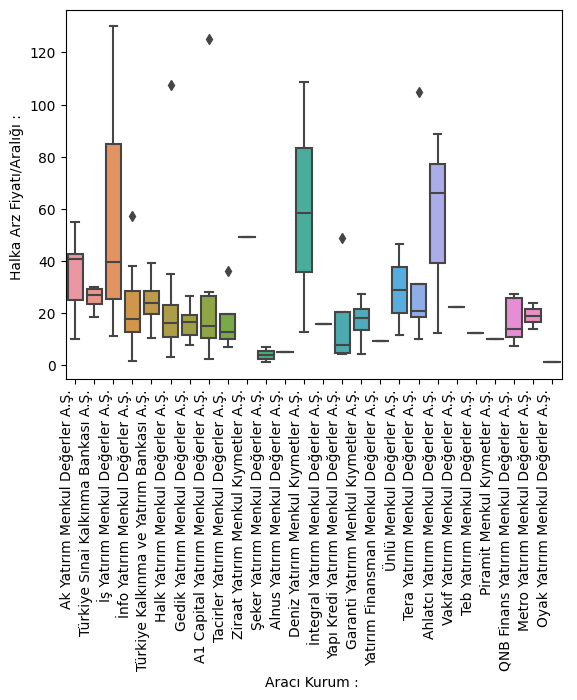

In [19]:
ax = sns.boxplot(x = info_df['Aracı Kurum : '], y =info_df['Halka Arz Fiyatı/Aralığı : ']);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

/var/folders/nw/gghxs9bd0xx7_4l1shb5xtmc0000gn/T/ipykernel_51816/3731042308.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


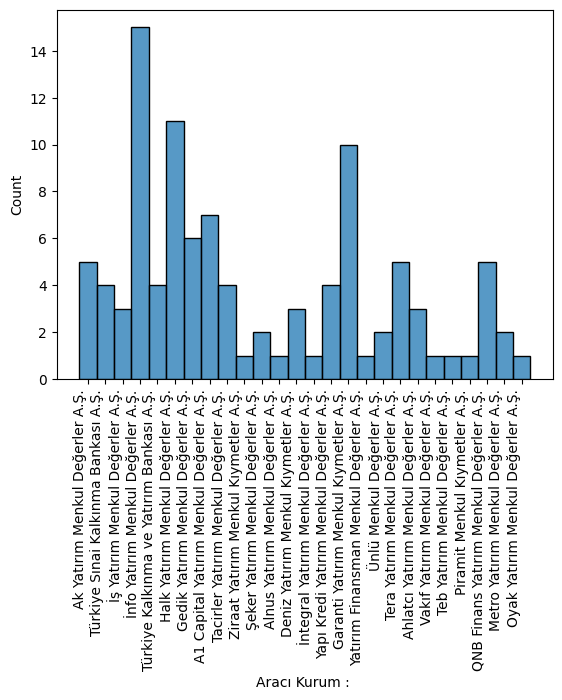

In [25]:
ax = sns.histplot(data=info_df, x=info_df["Aracı Kurum : "]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

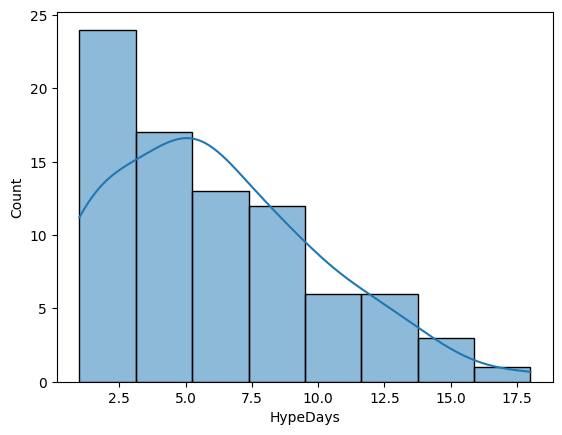

In [27]:
sns.histplot(data=df_, x=df_["HypeDays"], kde=True);

/var/folders/nw/gghxs9bd0xx7_4l1shb5xtmc0000gn/T/ipykernel_51816/3051269662.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


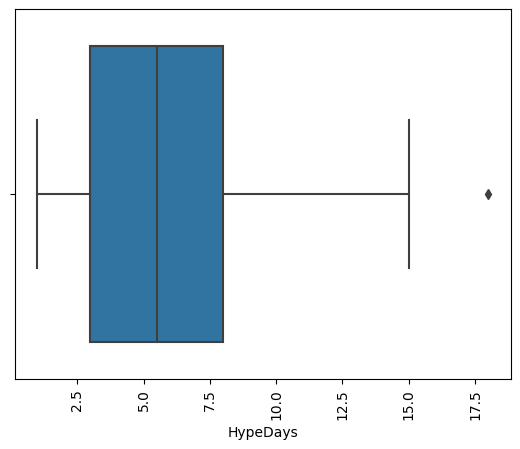

In [26]:
ax = sns.boxplot(x = df_["HypeDays"]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);